In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import torch
import json
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, AutoModelWithLMHead, AutoModelForSequenceClassification, TrainingArguments, Trainer
import huggingface_hub as hf_hub
import os
from utils import to_context_free_format, CLASS_MAP, iCLASS_MAP, predictions_to_evaluation_format
import datasets
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
import random
from eval import eval_across_domains
from load import load_prediction_and_gold
import wandb

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [3]:
train_file = Path.cwd().joinpath("public_data","train_inputs_full.json")

with open(train_file,"r") as f:
    train_dict_data = json.load(f)

In [31]:
full_data = datasets.Dataset.from_list(to_context_free_format(train_file))

In [32]:
full_data_df = full_data.to_pandas()

In [33]:
train_valid_gkf = GroupKFold()
valid_test_gkf = GroupKFold(n_splits=2)

In [99]:
def create_wordcloud(split,domain,text):
    wordcloud = WordCloud(max_font_size=45, max_words=50, background_color="white").generate(text)

    # Display the generated image:
    f = plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    f.savefig(f"{domain}-{split}.pdf", bbox_inches='tight')

0 case


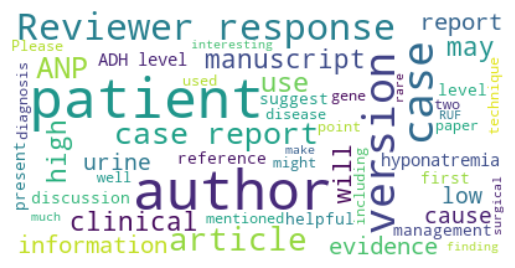

0 diso


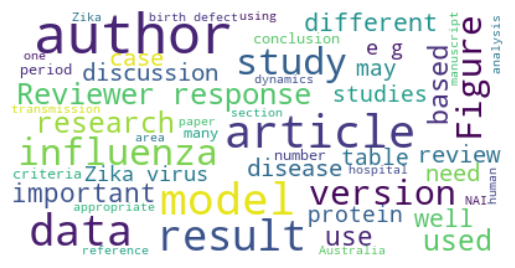

0 iscb


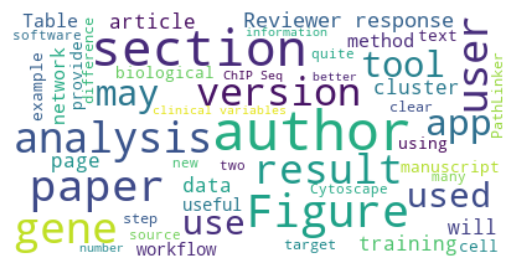

0 rpkg


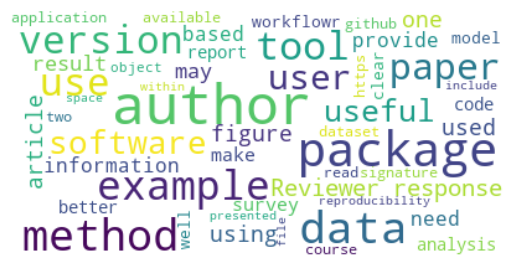

0 scip


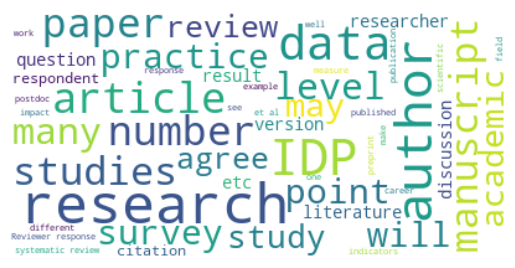

1 case


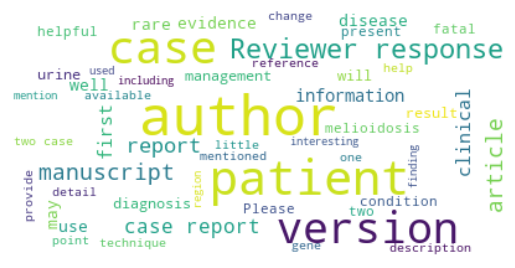

1 diso


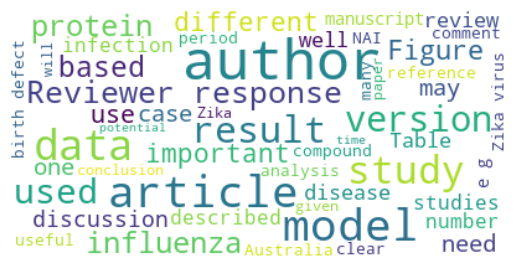

1 iscb


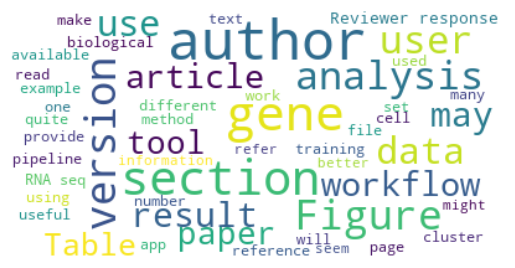

1 rpkg


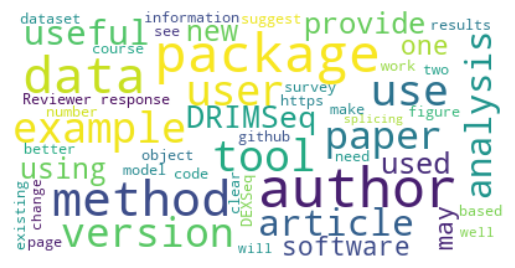

1 scip


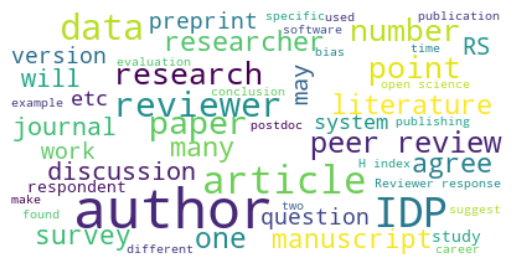

2 case


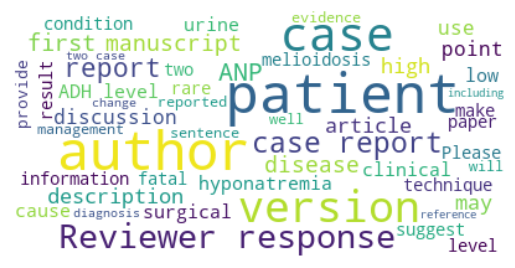

2 diso


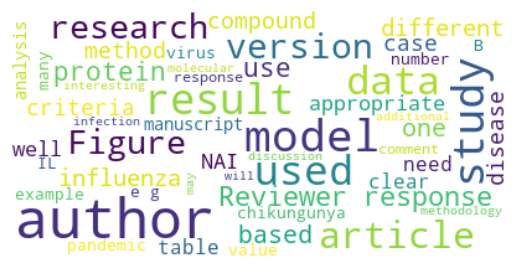

2 iscb


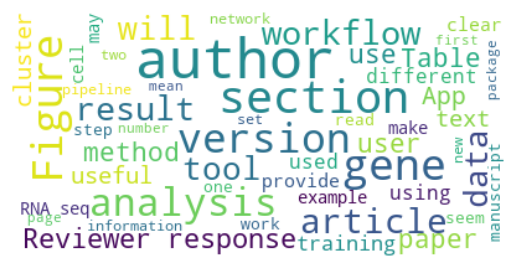

2 rpkg


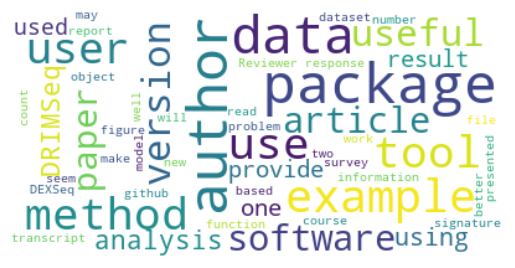

2 scip


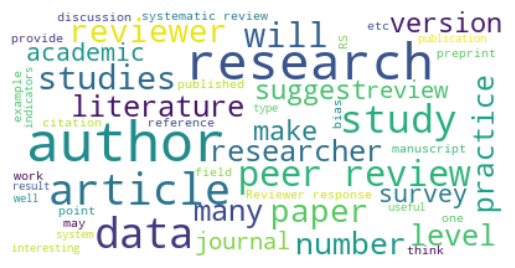

3 case


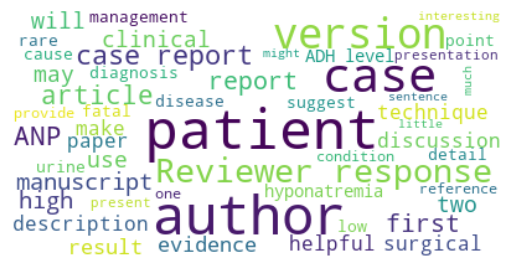

3 diso


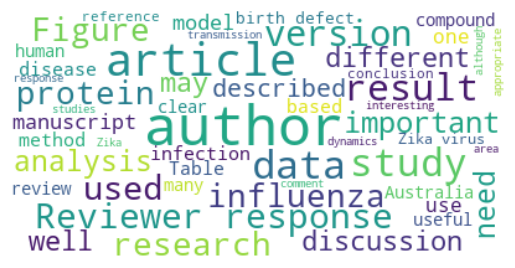

3 iscb


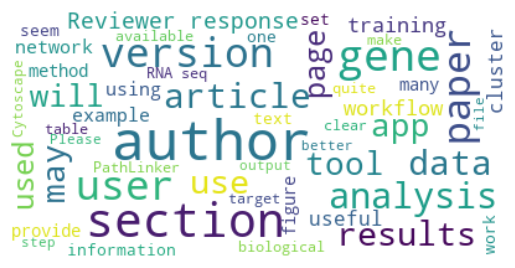

3 rpkg


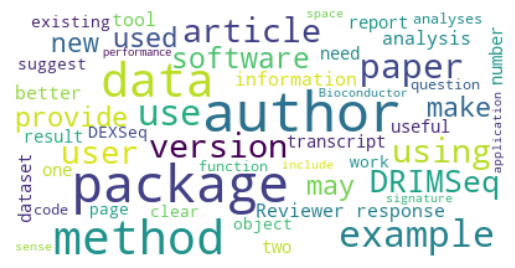

3 scip


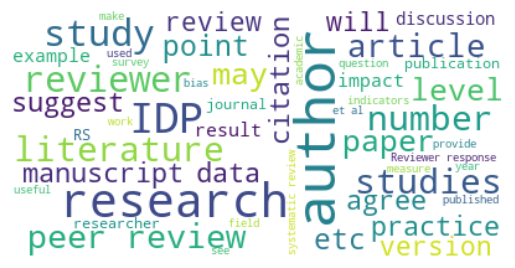

4 case


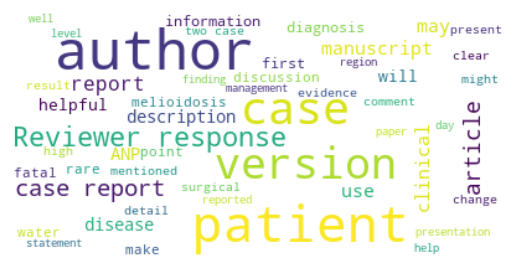

4 diso


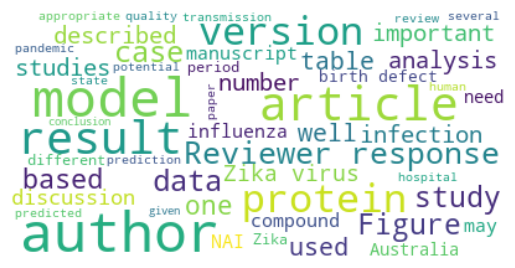

4 iscb


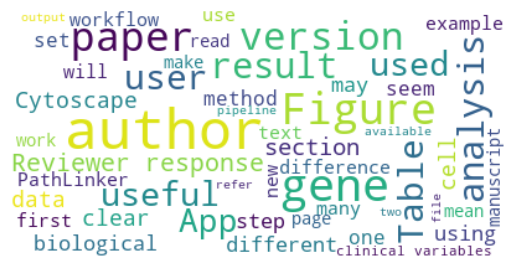

4 rpkg


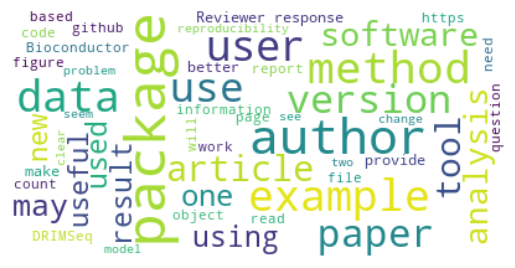

4 scip


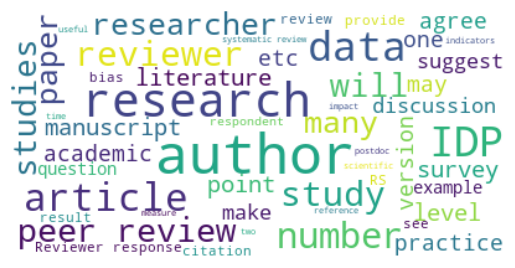

In [100]:
for idx,(train_idx, valid_idx) in enumerate(train_valid_gkf.split(X=full_data_df,y=full_data_df["label"],groups=full_data_df["report_id"])):
    # Splitting data into Train and validation
    train_df = full_data_df.loc[train_idx,:]    
    train_data = train_df.groupby("domain")["txt"].apply(lambda x: " ".join(x))
    for category in train_data.keys():
        print(idx,category)
        create_wordcloud(idx,category,train_data[category])

In [104]:
test_file = Path.cwd().joinpath("public_data","test_inputs.json")

with open(test_file,"r") as f:
    test_dict_data = json.load(f)
test_full_data = datasets.Dataset.from_list(to_context_free_format(test_file))
test_full_data = datasets.Dataset.from_list(to_context_free_format(test_file))
test_full_data_df = test_full_data.to_pandas()


case


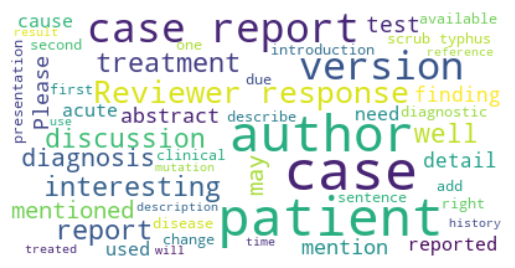

diso


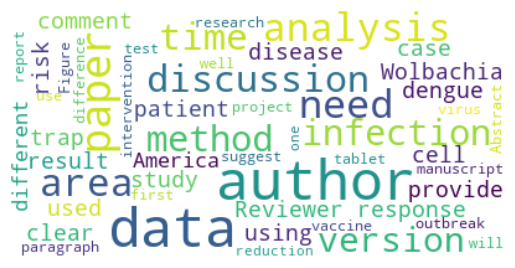

iscb


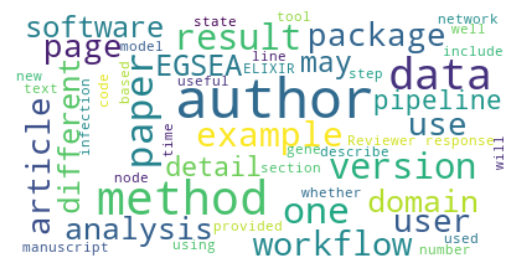

rpkg


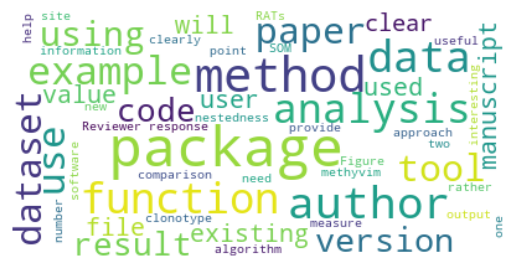

scip


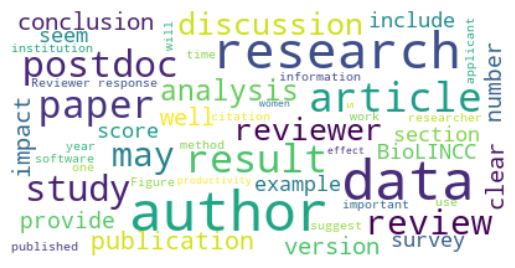

In [107]:
test_data = test_full_data_df.groupby(["domain"])["txt"].apply(lambda x: " ".join(x))
for category in test_data.keys():
    print(category)
    create_wordcloud(-1,category,test_data[category])